#Projekt Grupy 4 - Dengue

W pliku 'dengua.csv' znajduja sie dane opisujace ilosc przypadkow 'cases' goraczki Denga i wystepujacych w dniu badania czynnikow atmosferycznych, odczuwalnych, kategorii i ilosci przypadkow.
 'serial' - nr pozadkowy ,
 'tempmax' - temp zmierzona maksymalna [C],
 'tempmin' - temp zmierzona minimalna [C],
 'temp' - temp zmierzona srednia [C],
 'feelslikemax' - temp odczuwalna maksymalna [C],
 'feelslikemin' - temp odczuwalna minimalna [C],
 'feelslike' - temp odczuwalna Srednia [C],
 'dew' - rosa,
 'humidity' - wilgotnosc,
 'precip' - opady,
 'precipprob' - prawdopodobienstwo wystapienia opadow,
 'precipcover' - procentowy czas trwania opadow,
 'snow' - snieg,
 'snowdepth' - grubos pokrywy sknieznej,
 'windspeed' - predkosc wiatru,
 'winddir' - kierunek wiatru,
 'sealevelpressure' - cisnienie atmosferyczne zredukowane do poziomu morza,
 'cloudcover' - stopien zachmurzenia,
 'visibility' - widocznosc,
 'solarradiation' - promieniowanie sloneczne,
 'solarenergy' - ilosc enbergii slonecznej,
 'uvindex' - index UV (untrafiolet),
 'conditions' - warunki ,
 'stations' - stacje,
 'cases' - przypadki,
 'labels' - etykiety

Celem tego zadania jest proba wykorzystania modeli Regresji Liniowej i Klasyfikacji biblioteki Sci-Kit Learn do przewidzenia przyszlych przypadkow zachorowan na podstawnie posiadanych danych ze stacji meteorologicznych.

Regresja limniowa posluzy za oszacowanie ilosci strwqierdzoncyh przypadkow 'cases' (wspolczynnik zalezny) w oparciu o jeden lub wiecej wspolczynnikow niezaleznych (dane meteorologiczne).

Klasyfikacja ma sluzyc do nadania etykiety [malo, umiarkowanie, duzo] na podstawie czynnikow wejsciowych


EDA


Ładowanie Pandas, MatplotLib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Ładowanie danych z pliku do Pandas DataFrame

In [2]:
#Ładowanie danych do Pandas DataFrame
data = pd.read_csv('dengue.csv')

EDA

In [3]:
# data.columns.tolist()
# analiza statystyczna danych w kolumnach
data.describe()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,300.500000,31.918079,24.588318,27.813181,38.476069,25.613154,31.485111,23.984349,81.254786,13.120862,...,191.498693,1004.690531,59.701192,3.632620,199.802695,17.251785,6.877674,1.827725,0.859734,8502.342193
std,173.926709,2.737215,2.727919,2.412416,4.776400,4.178797,4.672951,2.668014,9.406354,28.463365,...,81.604668,41.364967,20.832639,1.890352,54.128192,4.676051,1.763928,1.237389,0.973575,6780.749627
min,0.000000,25.000000,12.740000,18.820000,25.000000,12.360000,18.626667,4.480000,40.833333,0.000000,...,0.500000,0.000000,0.000000,0.800000,57.900000,5.000000,2.000000,0.000000,0.000000,52.000000
25%,150.250000,30.025000,23.200000,26.500000,35.600000,23.200000,28.100000,23.300000,75.800000,0.000000,...,134.425000,1002.025000,47.400000,2.523780,160.350000,13.900000,6.000000,1.000000,0.000000,3017.750000
50%,300.500000,31.700000,25.000000,27.900000,38.400000,25.000000,31.500000,24.529268,82.800000,3.000000,...,207.300000,1007.000000,63.700000,3.200000,205.750000,17.750000,7.000000,2.000000,1.000000,7490.000000
75%,450.750000,33.600000,26.500000,29.448171,41.900000,26.600000,34.875000,25.475000,88.175000,12.589000,...,252.375000,1010.185772,73.200000,4.300000,238.800610,20.600610,8.000000,3.000000,1.000000,12702.500000
max,601.000000,41.200000,29.400000,33.300000,49.600000,37.900000,42.900000,28.100000,99.300000,302.000000,...,359.200000,1020.000000,97.900000,24.033333,318.500000,27.700000,10.000000,4.000000,5.000000,24983.000000


In [4]:
# sprawdzenie typow danych w kolumnach
data.dtypes

serial                int64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
conditions          float64
stations            float64
cases               float64
labels               object
dtype: object

In [5]:
# sprawdzanbie wartosci NA/NaN
data.isna().sum()

serial              0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
conditions          0
stations            0
cases               0
labels              0
dtype: int64

In [6]:
# poglad na dane
data.head(10)

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal
5,5,28.279675,20.695122,23.818699,29.506504,20.695122,24.056098,19.927642,80.494309,4.219911,...,0.000000,59.769919,7.062602,195.847967,16.925203,7.008130,0.853659,0.983740,9669.0,normal
6,6,32.060163,25.723577,28.496748,38.978049,27.621951,33.214634,24.824390,81.698374,6.349325,...,1003.519512,57.928455,3.264228,196.900000,17.007317,6.788618,1.447154,0.000000,6772.0,normal
7,7,34.237398,26.526016,29.847967,41.382114,28.377236,34.901626,24.558537,74.819512,8.959569,...,1008.212195,56.070732,6.056098,169.027642,14.573171,5.967480,0.544715,1.869919,10342.0,normal
8,8,34.460976,23.867480,28.787805,39.463415,24.445528,32.002439,21.492683,67.514634,4.517886,...,1003.942276,29.597561,2.595122,238.502439,20.600813,7.731707,1.756098,1.000000,12542.0,normal
9,9,30.769106,23.066667,26.313821,36.357724,23.066667,28.114634,24.065854,88.390244,11.597561,...,1010.143089,78.597561,3.722764,208.988618,18.047967,7.382114,2.422764,0.764228,150.0,normal


In [7]:
# usuwanie zbednych kolumn ['serial','feelslikemax','feelslikemin','feelslike'] i pustych kolumn ['snow','snowdepth'] 
data.drop(columns=['serial','tempmax','tempmin','feelslikemax','feelslikemin','feelslike','snow','snowdepth'], inplace=True)

In [8]:
# zaokraglanie do 3mpp
data = data.round(3)
data['conditions'] = data['conditions'].round(0).astype(int)
data['stations'] = data['stations'].round(0).astype(int)

In [9]:
# konwersja liczby prtzypadkow do INT
data['cases'] = data['cases'].astype(int)

In [10]:
# podglad danych
data.head()

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,28.710,22.971,73.508,2.922,44.658,4.361,15.678,175.595,1007.912,50.748,3.790,208.098,17.974,7.233,3,1,4925,normal
1,29.464,23.485,72.067,3.783,39.837,2.677,14.575,158.350,1003.533,48.314,2.885,222.926,19.246,7.504,2,1,5077,normal
2,29.527,22.580,69.424,3.066,33.333,2.338,14.978,202.621,1005.732,55.621,4.242,229.413,19.802,7.829,2,1,7579,normal
3,28.728,21.752,69.298,6.025,37.398,2.677,16.505,183.545,1003.359,50.208,2.991,225.422,19.480,7.593,1,0,13706,normal
4,26.775,24.215,86.652,23.337,96.748,15.617,19.546,224.030,1009.996,45.542,3.887,176.598,15.262,6.187,1,4,82,normal


In [11]:
# Seaborn do wykresow
import seaborn as sns
%matplotlib inline

In [12]:
# macierz korelacji, usuwanie 'labels' bo macierz operuje na liczbach
correlation_matrix = data.drop(columns='labels').corr()

<Axes: >

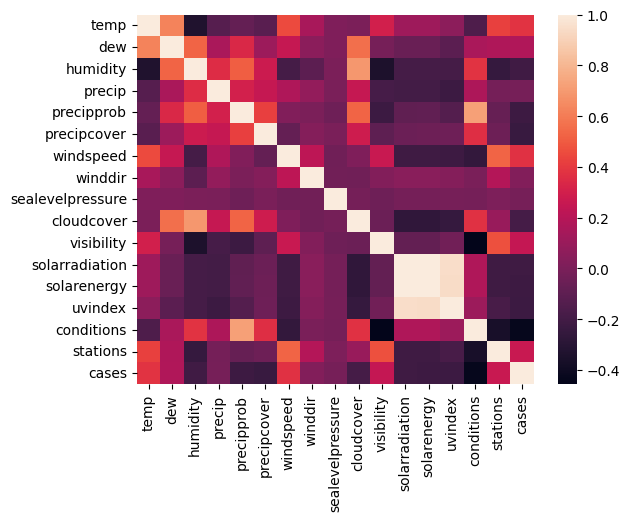

In [13]:
#wizualizacja macierzy korelacji
sns.heatmap(correlation_matrix)

In [14]:
#przygotowanie listy kolumna dla petli FOR
columns = data.drop(columns=['labels','cases']).columns.values
columns

array(['temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'conditions', 'stations'], dtype=object)

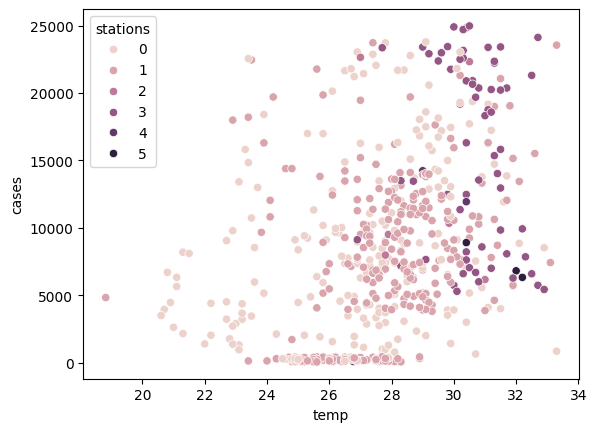

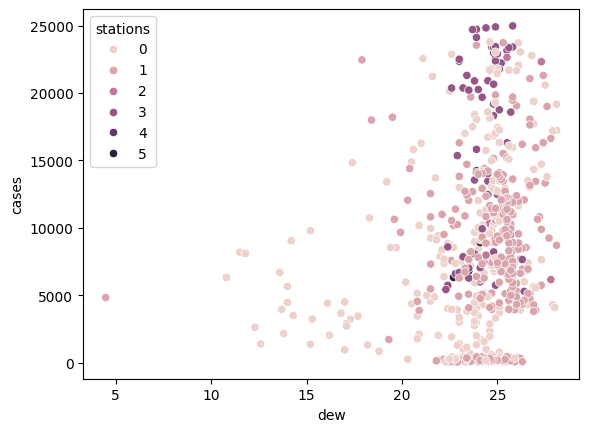

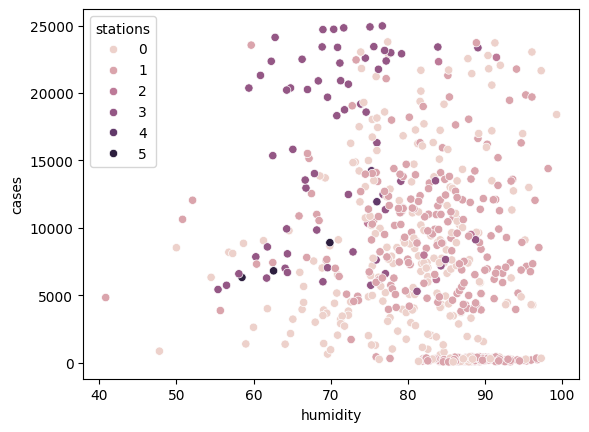

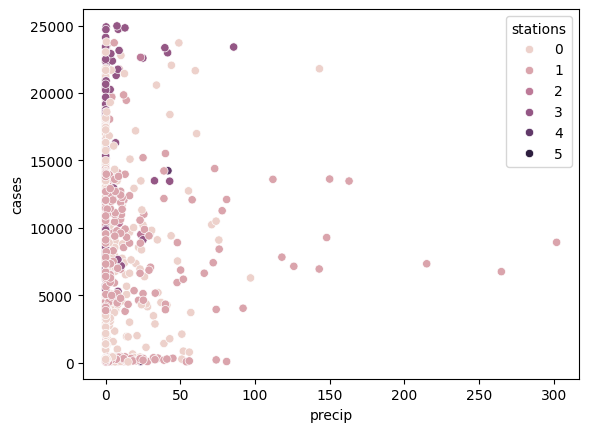

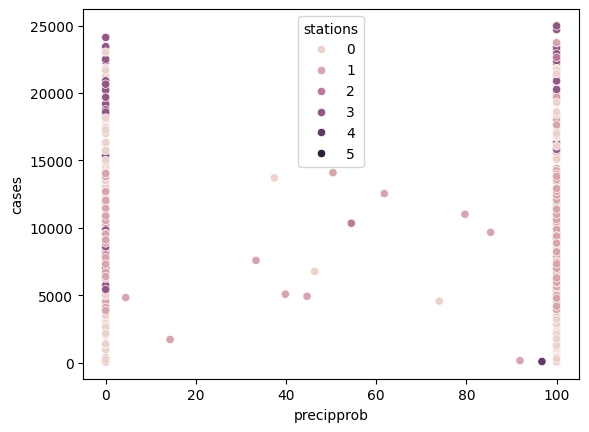

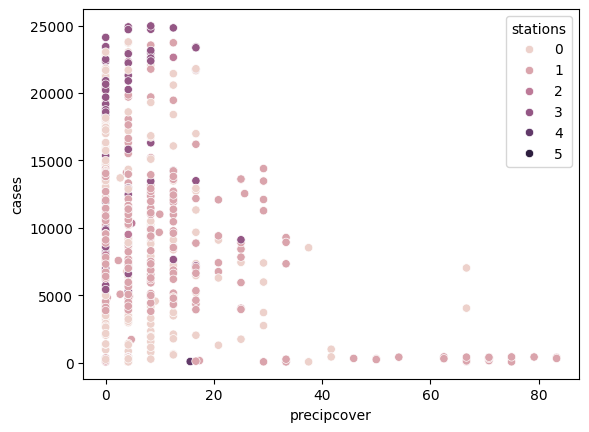

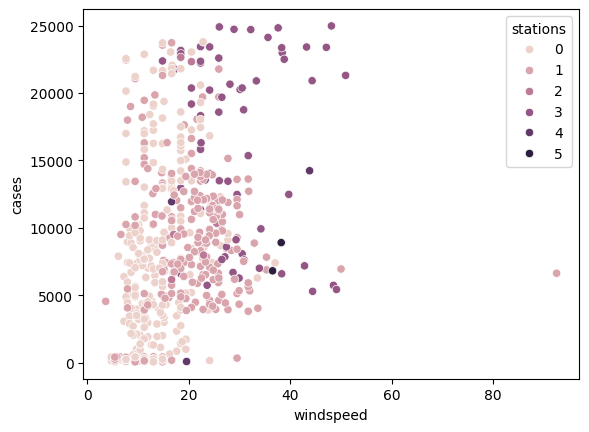

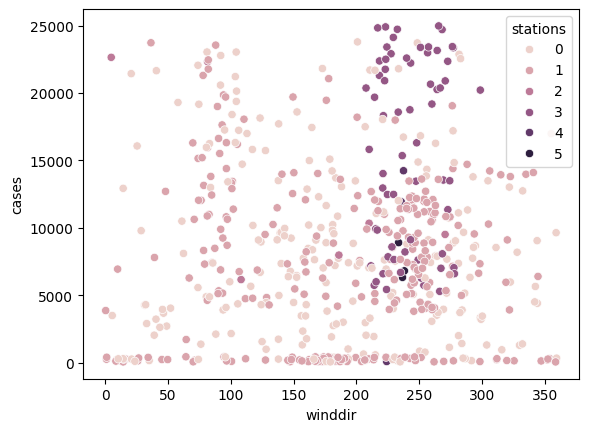

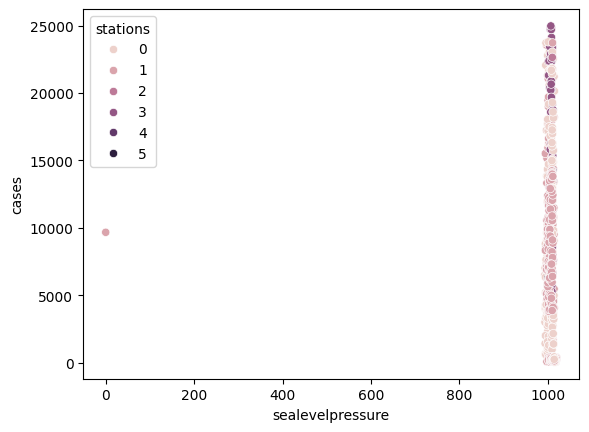

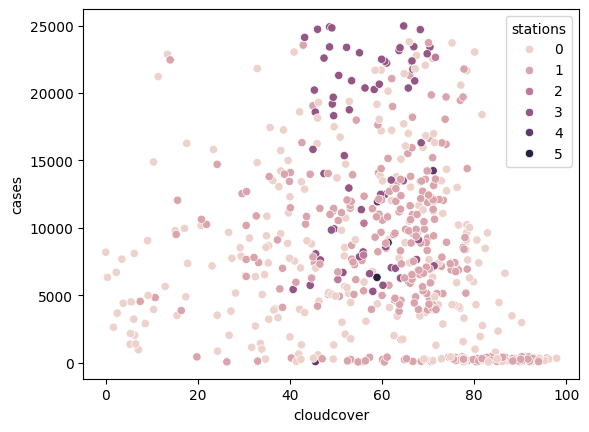

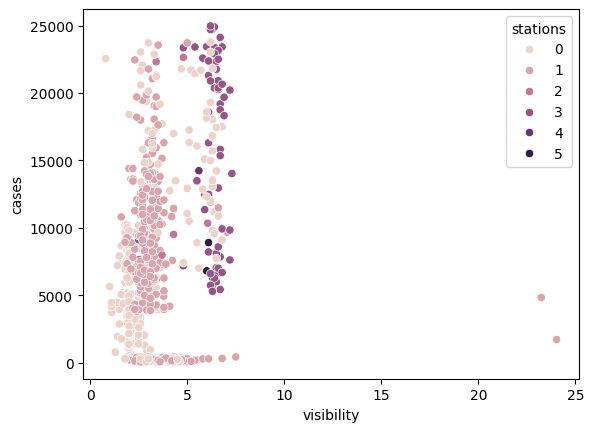

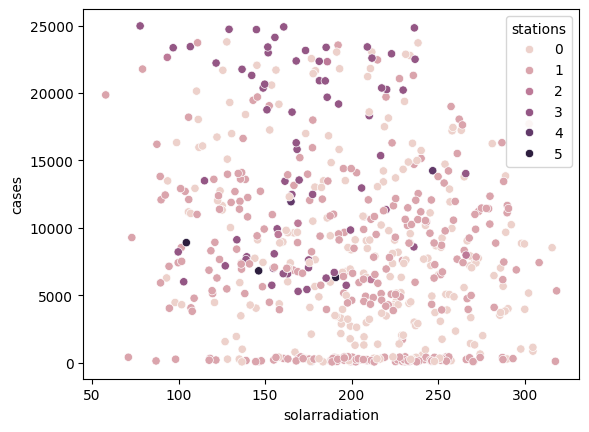

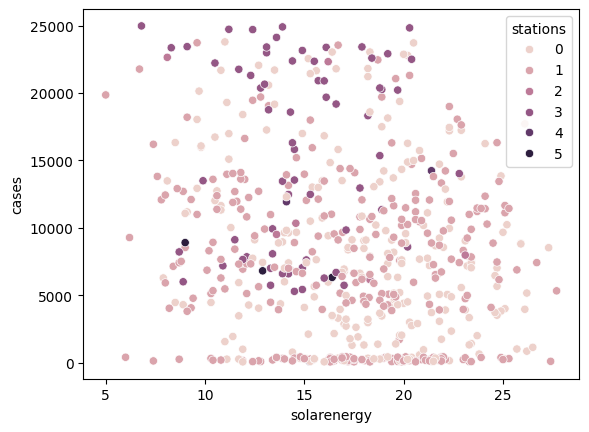

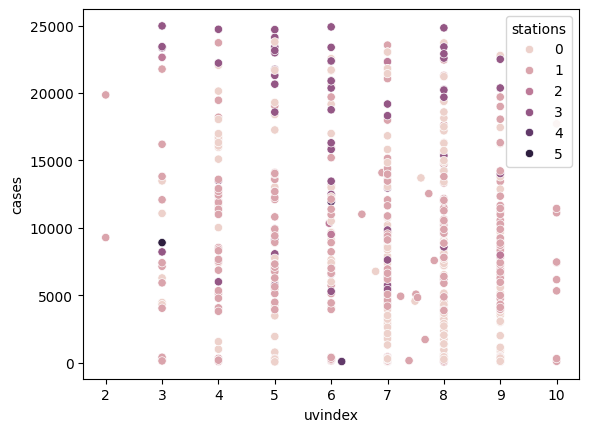

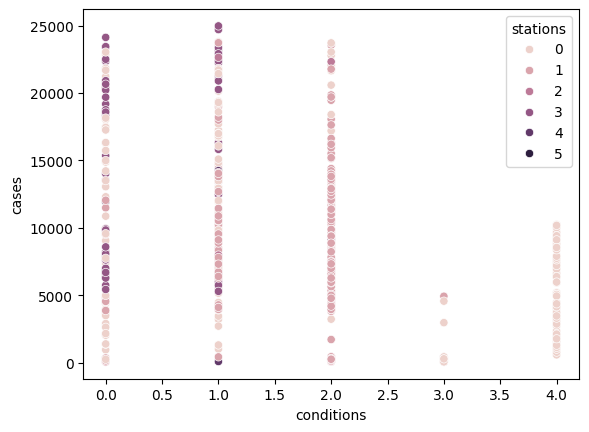

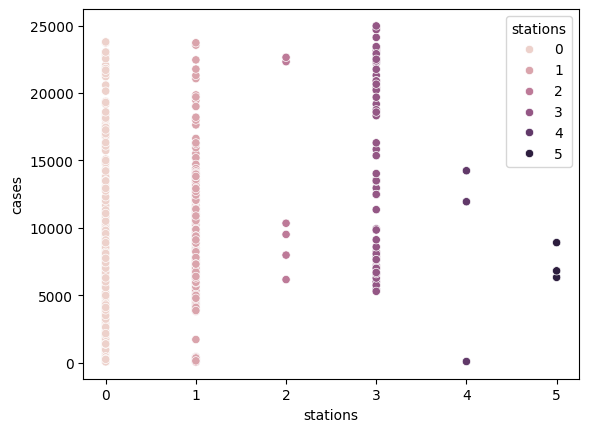

In [15]:


# for column in columns:
#     fig, ax = plt.subplots()
#     ax.scatter(x = data[column], y = data['cases'] )
#     plt.xlabel(column)
#     plt.ylabel('Cases')
#     plt.legend()
# plt.show() 

for column in columns:
    sns.scatterplot(x = data[column], y = data['cases'], hue=data['stations'])
    plt.show()
 



In [16]:
# plt.boxplot(data['temp'])
# plt.show()

# def box_plot_iterate(input_data, input_column):
#     input_data.boxplot(column=input_column)
#     plt.legend(column)


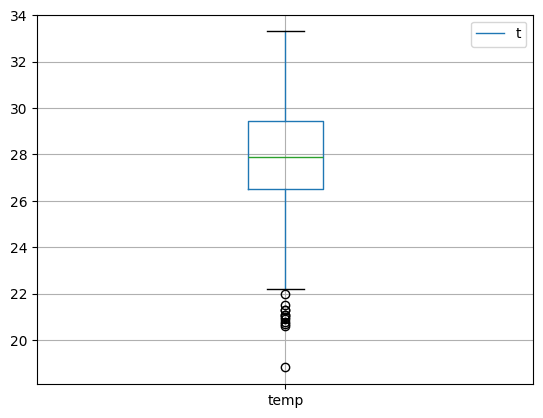

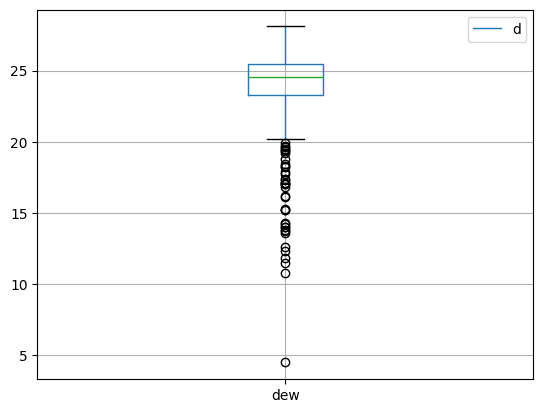

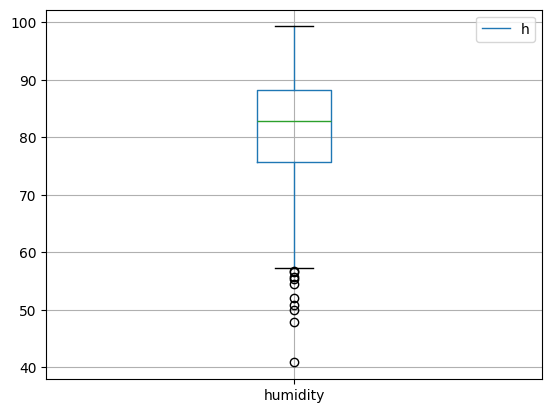

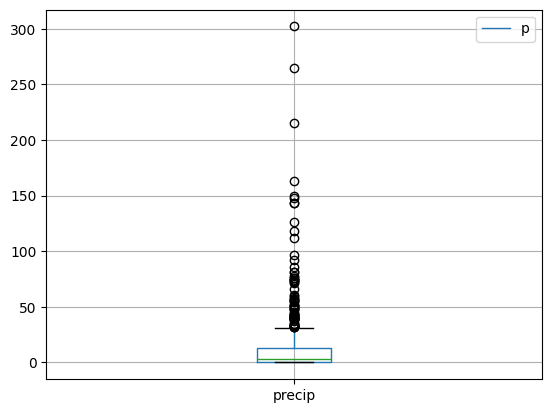

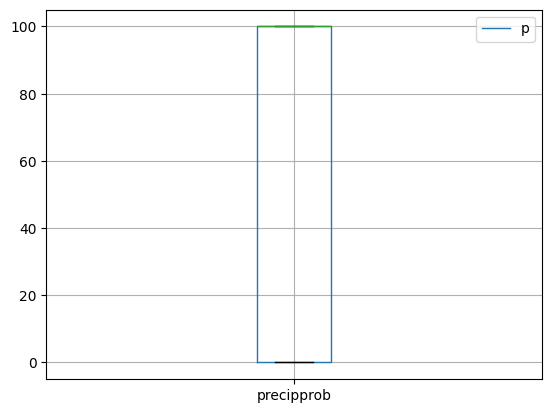

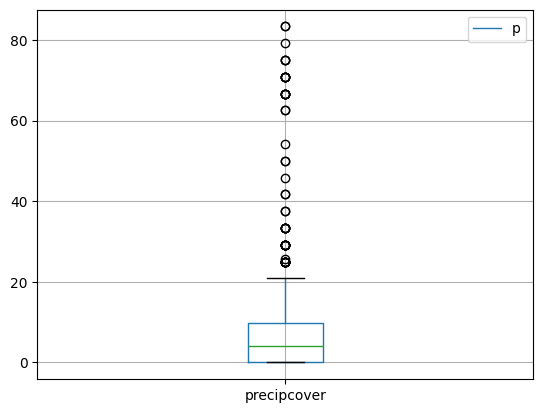

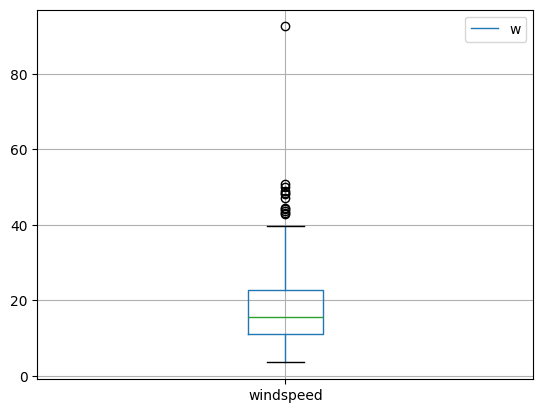

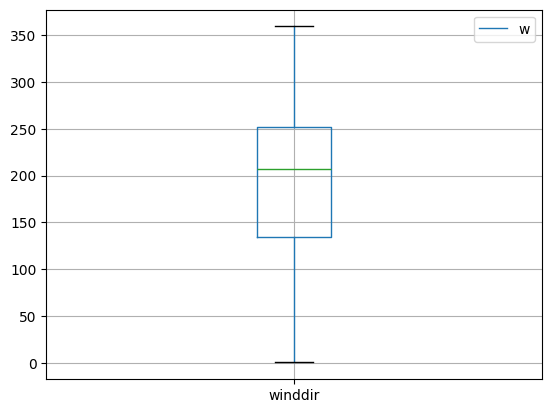

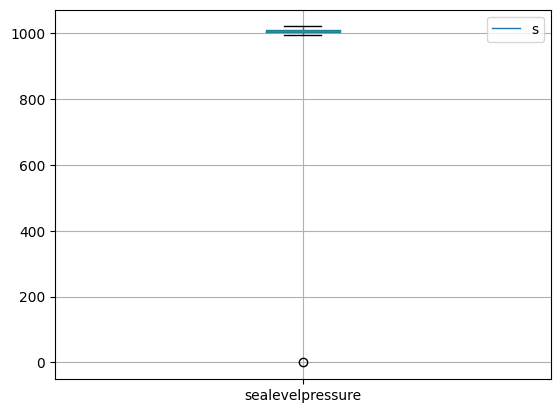

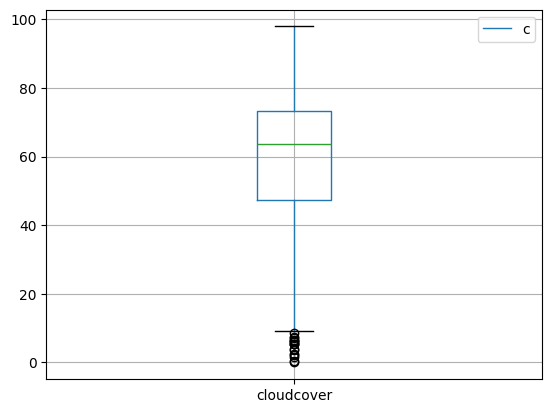

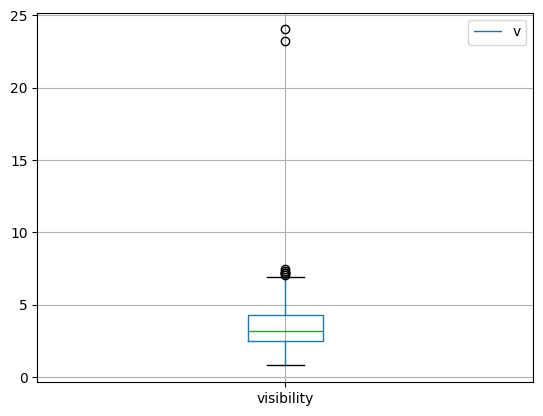

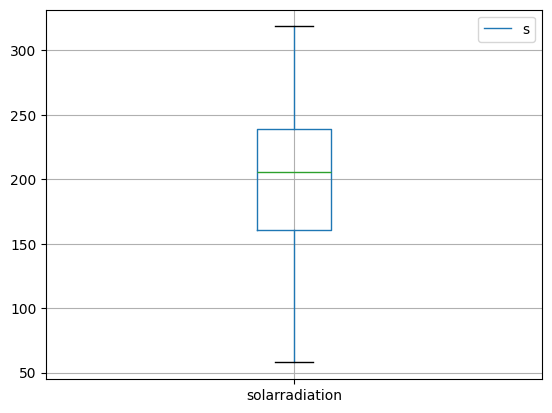

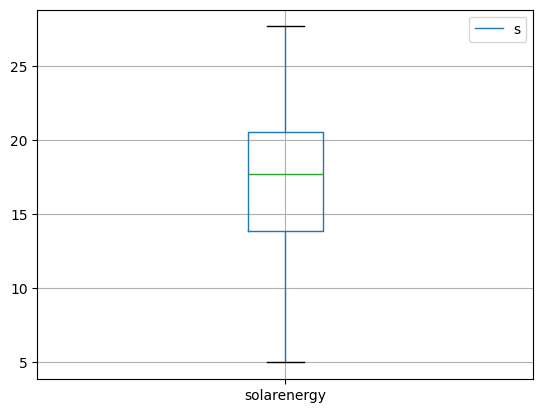

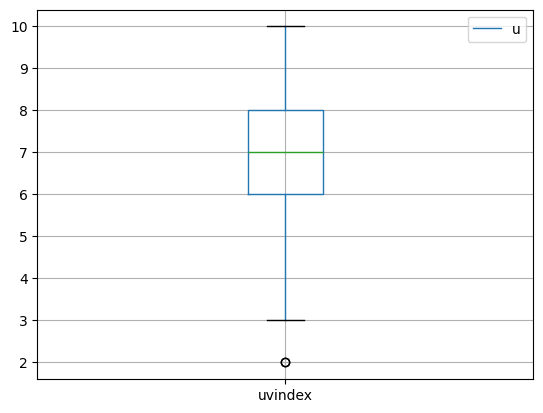

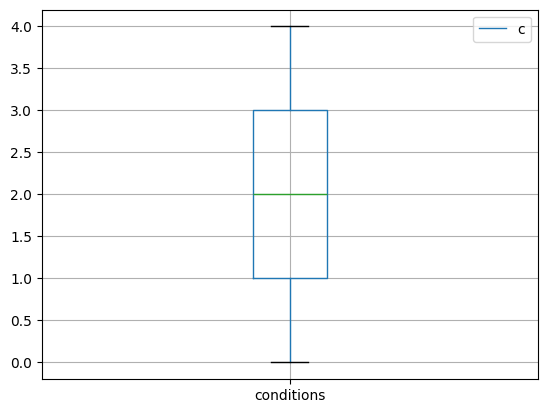

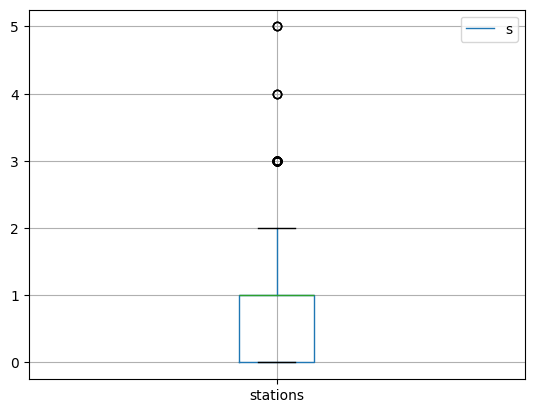

In [17]:
# spradzdfznie odstajacyh danych

for column in columns:

    data.boxplot(column= column)
    plt.legend(column)
    # plt.
    plt.show()
 

In [18]:
# for column in columns:

#     data.boxplot(column= column)
#     plt.legend(column)
#     # plt.
#     plt.show()
columns = data.drop(columns=['labels','cases']).columns.values
columns = columns.tolist()

 

In [19]:

type(columns)
columns.pop(-1) #exclude spations

to_remove = []
for column in columns:
    s = data[column].std()
    # print(column,data[(data[column] < data[column].mean() - 3 * s) | (data[column] > (data[column].mean() + 3 * s))].index.to_list())
    for index in data[(data[column] < data[column].mean() - 3 * s) | (data[column] > (data[column].mean() + 3 * s))].index.to_list():
        to_remove.append(index)
        # print(index)
to_remove = set(to_remove)

# rows to remove
len(to_remove)

60

In [20]:
# 

In [21]:
data.drop(to_remove, inplace=True)

In [22]:
data.head()

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,28.710,22.971,73.508,2.922,44.658,4.361,15.678,175.595,1007.912,50.748,3.790,208.098,17.974,7.233,3,1,4925,normal
1,29.464,23.485,72.067,3.783,39.837,2.677,14.575,158.350,1003.533,48.314,2.885,222.926,19.246,7.504,2,1,5077,normal
2,29.527,22.580,69.424,3.066,33.333,2.338,14.978,202.621,1005.732,55.621,4.242,229.413,19.802,7.829,2,1,7579,normal
3,28.728,21.752,69.298,6.025,37.398,2.677,16.505,183.545,1003.359,50.208,2.991,225.422,19.480,7.593,1,0,13706,normal
4,26.775,24.215,86.652,23.337,96.748,15.617,19.546,224.030,1009.996,45.542,3.887,176.598,15.262,6.187,1,4,82,normal


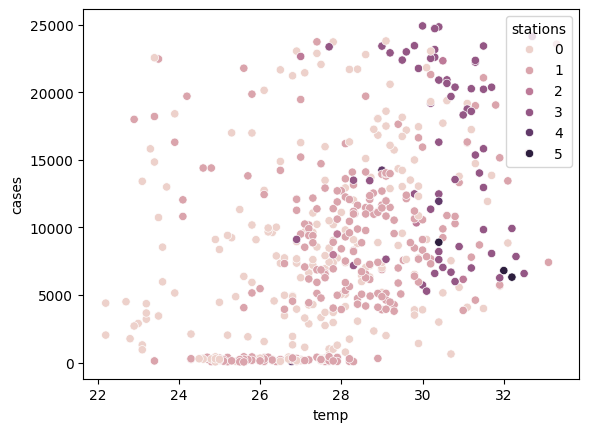

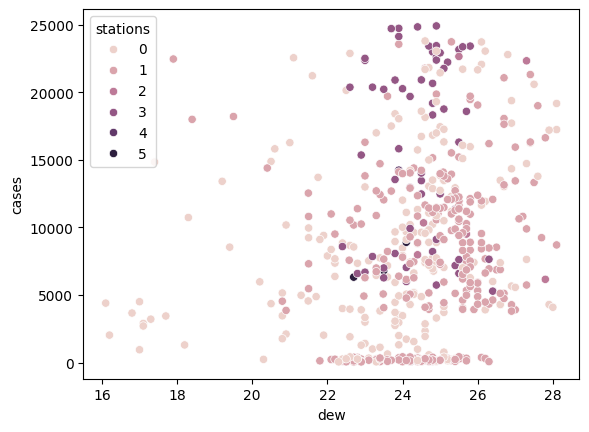

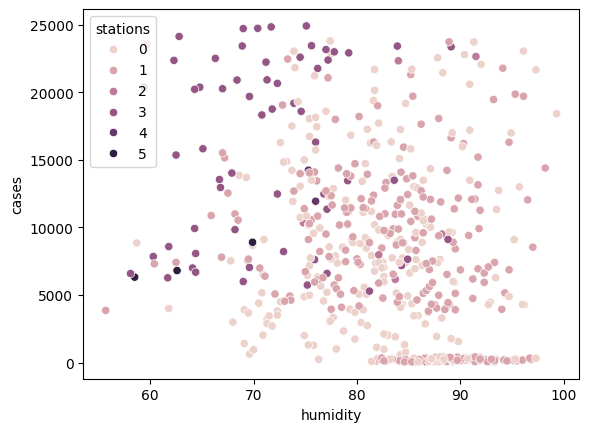

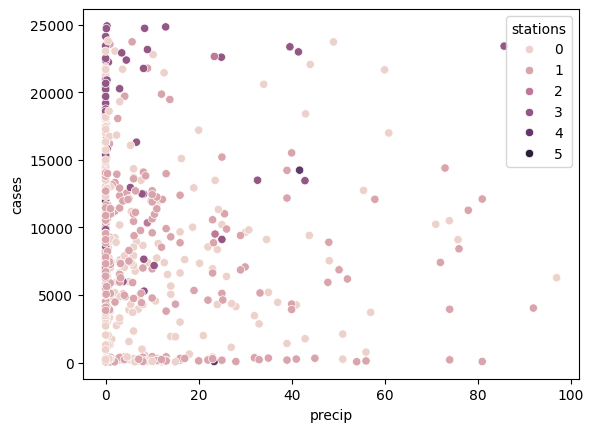

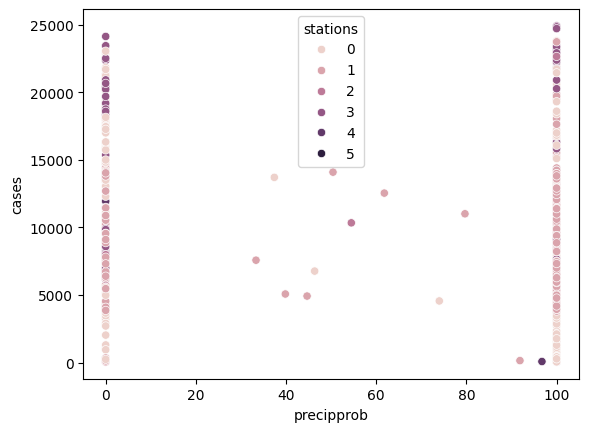

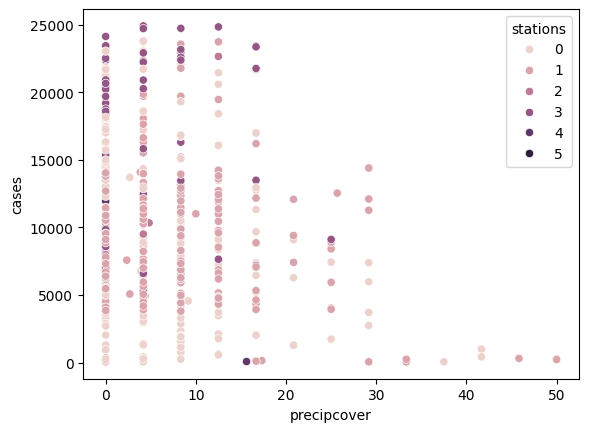

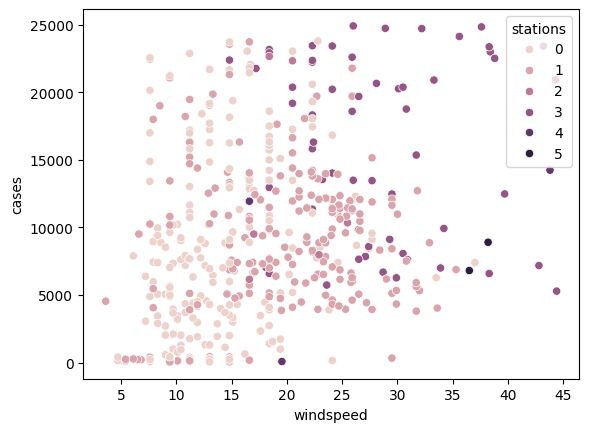

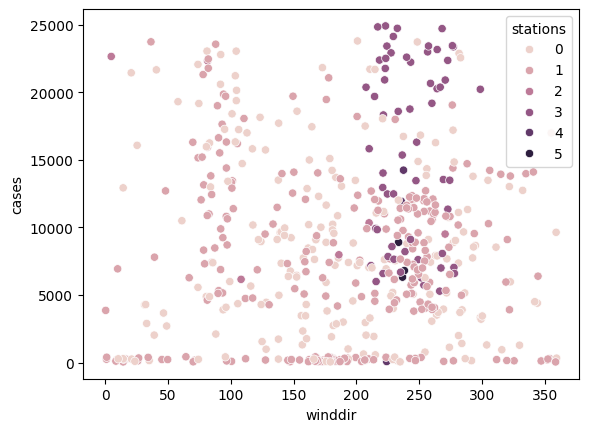

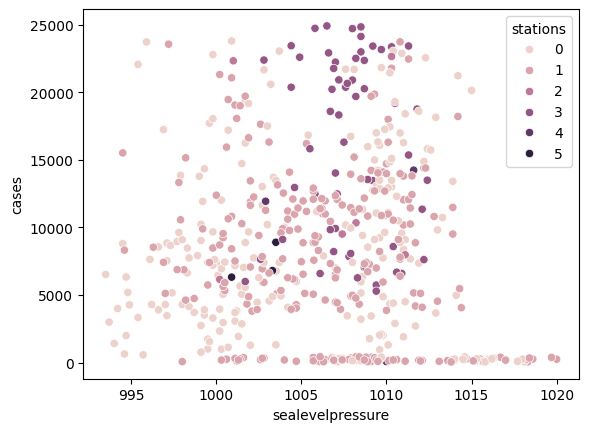

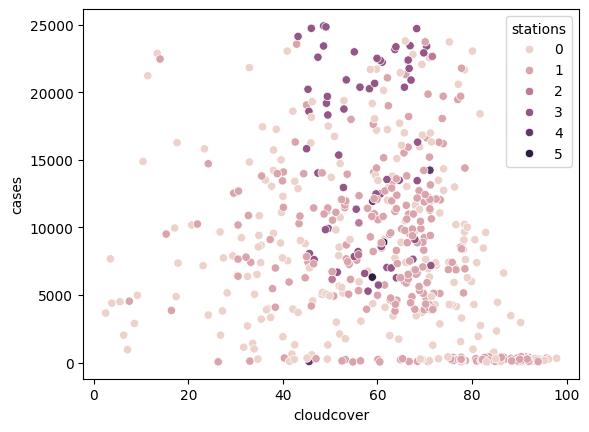

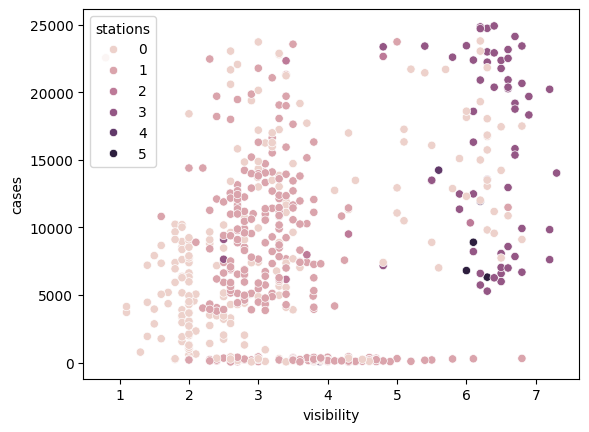

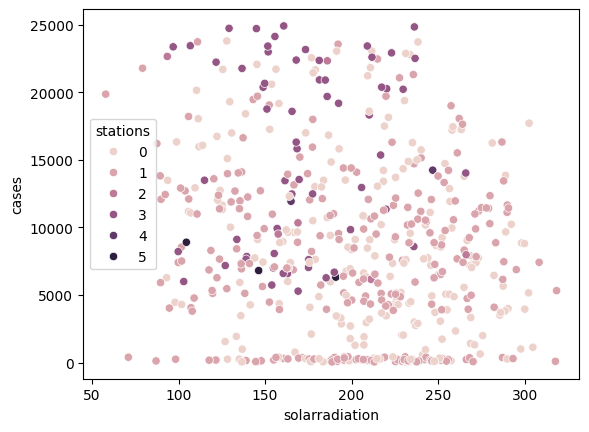

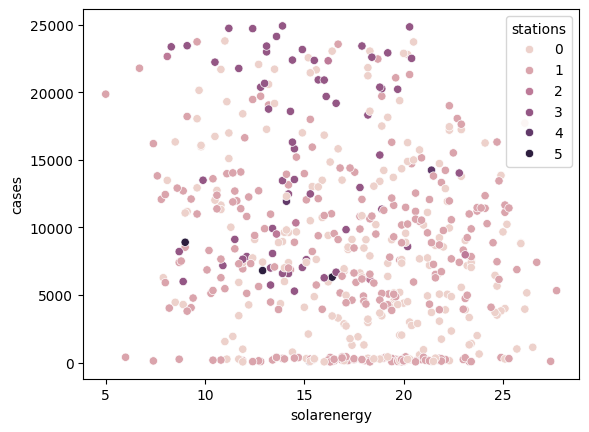

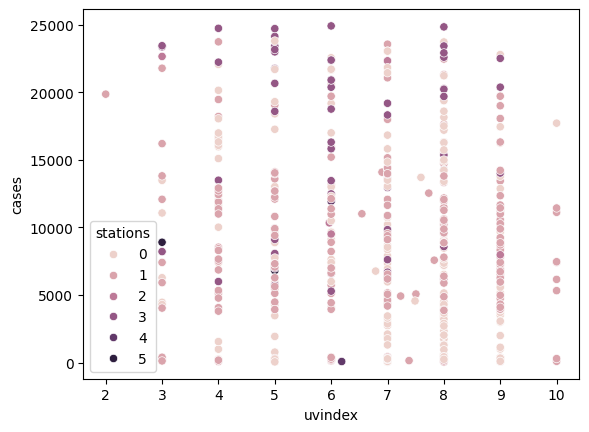

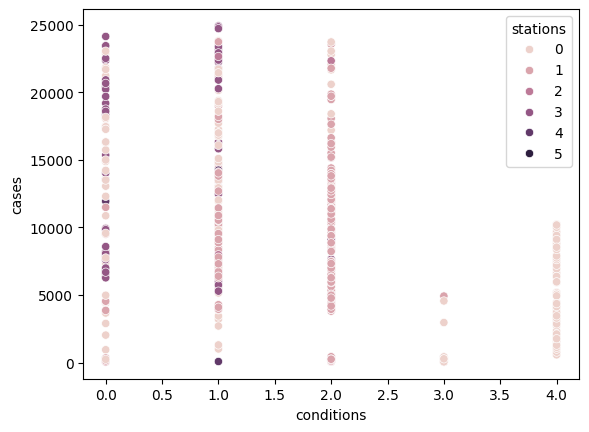

In [23]:
for column in columns:
    sns.scatterplot(x = data[column], y = data['cases'], hue=data['stations'])
    plt.show()
 


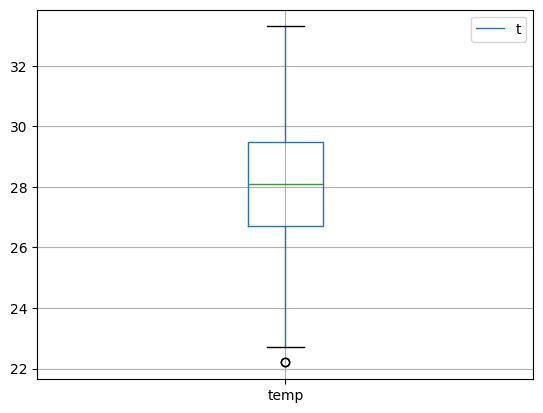

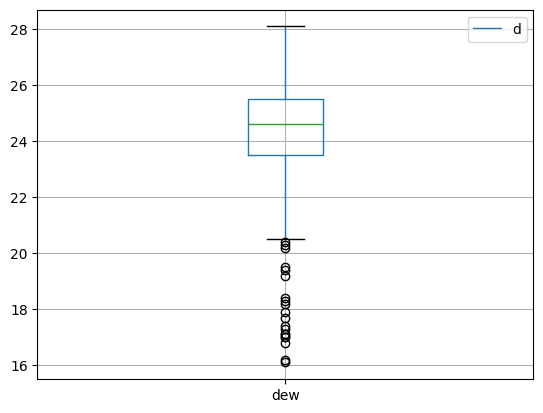

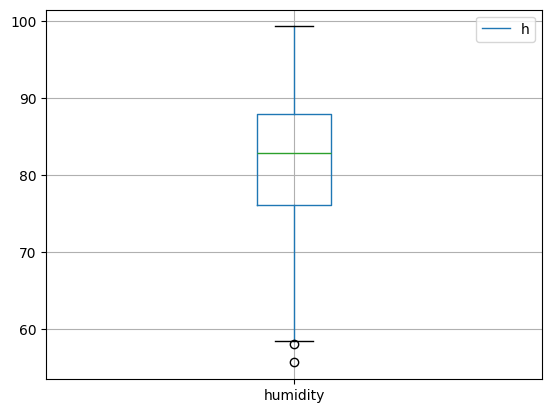

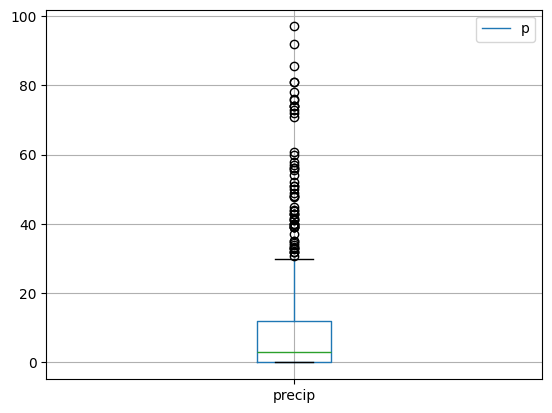

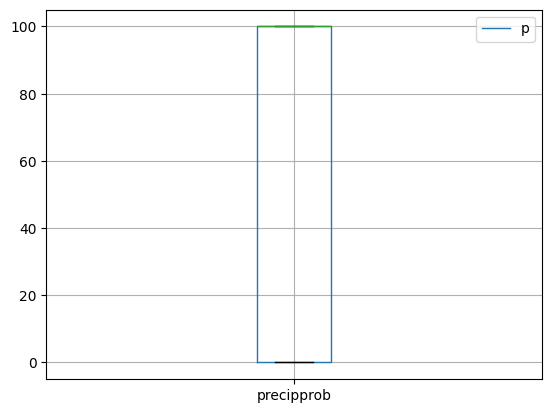

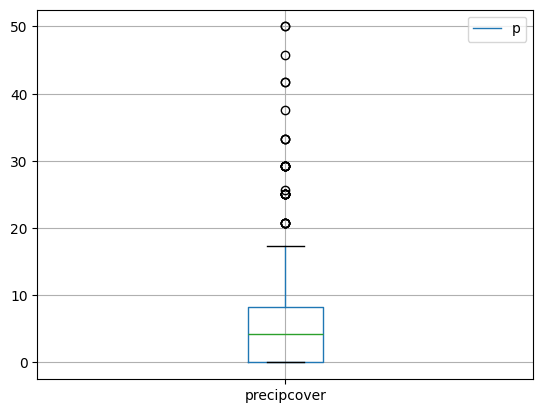

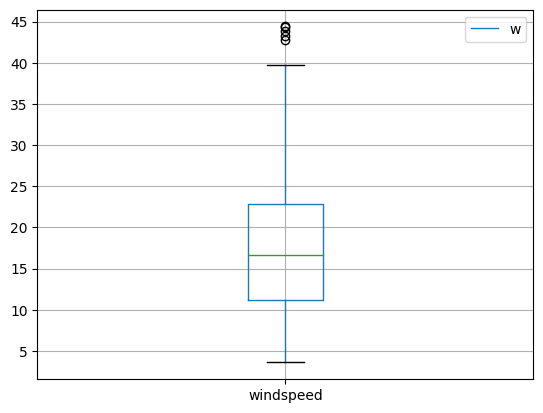

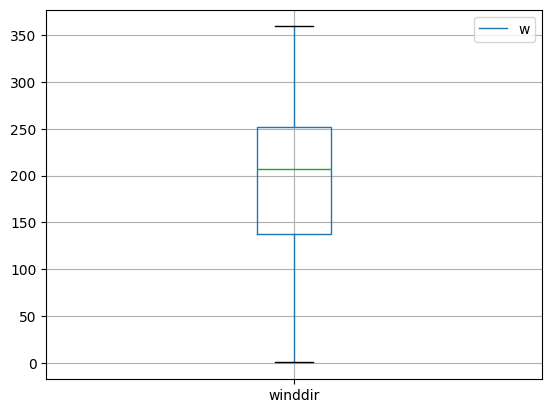

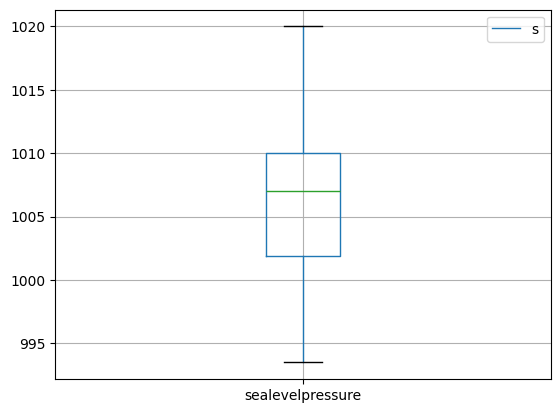

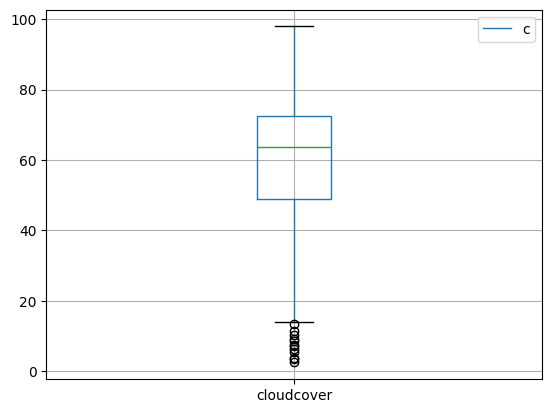

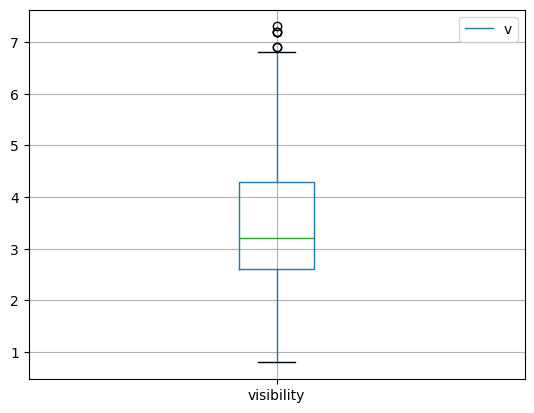

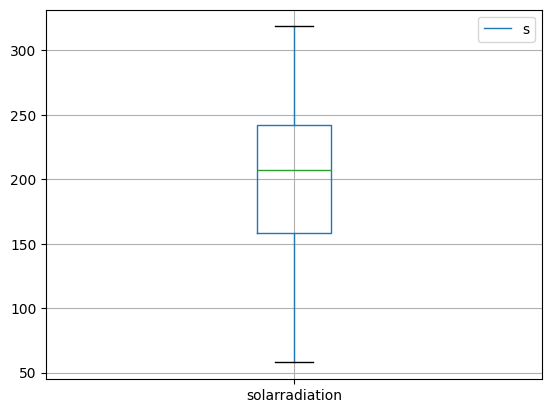

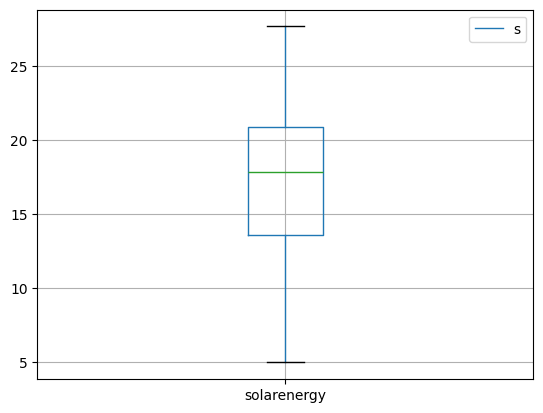

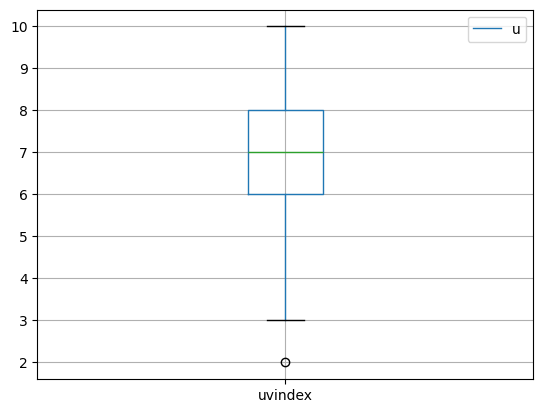

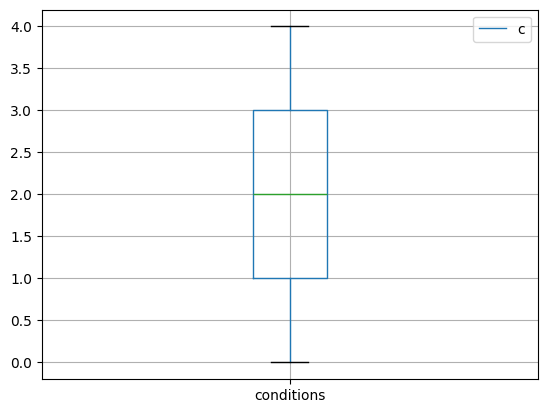

In [24]:
for column in columns:

    data.boxplot(column= column)
    plt.legend(column)
    # plt.
    plt.show()

In [25]:
data

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,28.710,22.971,73.508,2.922,44.658,4.361,15.678,175.595,1007.912,50.748,3.790,208.098,17.974,7.233,3,1,4925,normal
1,29.464,23.485,72.067,3.783,39.837,2.677,14.575,158.350,1003.533,48.314,2.885,222.926,19.246,7.504,2,1,5077,normal
2,29.527,22.580,69.424,3.066,33.333,2.338,14.978,202.621,1005.732,55.621,4.242,229.413,19.802,7.829,2,1,7579,normal
3,28.728,21.752,69.298,6.025,37.398,2.677,16.505,183.545,1003.359,50.208,2.991,225.422,19.480,7.593,1,0,13706,normal
4,26.775,24.215,86.652,23.337,96.748,15.617,19.546,224.030,1009.996,45.542,3.887,176.598,15.262,6.187,1,4,82,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,28.500,23.300,75.000,0.000,0.000,0.000,17.100,159.800,1008.900,50.400,3.100,252.500,21.900,9.000,1,1,6729,normal
598,29.300,22.600,68.500,0.000,0.000,0.000,16.600,233.000,1010.400,50.500,3.100,242.700,20.900,8.000,1,1,10541,normal
599,29.800,23.900,71.100,0.000,0.000,0.000,19.000,344.400,1010.800,30.500,3.100,195.300,16.900,8.000,1,1,6396,normal
600,30.600,23.300,65.900,0.000,0.000,0.000,14.700,81.300,1009.700,32.700,3.300,187.600,16.000,7.000,1,1,10883,normal


In [26]:
# Standarize
from sklearn.preprocessing import StandardScaler

df_labels = data['labels']
# iniclalizacja klasy
scaler = StandardScaler()

data_std = pd.DataFrame(scaler.fit_transform(data.drop(columns='labels')), columns = data.drop(columns='labels').columns)

data_std_label = data_std.merge(df_labels,left_index=True, right_index=True, how='inner' )

In [27]:
# dff = pd.get_dummies(data_std_label['labels'])
import numpy as np
# dff.describe()

data['lab'] = \
np.where(data['cases'] < 10000, 1, \
np.where(data['cases'] < 20000, 2, 3)     
         )

# 24910.000000

In [28]:
data

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels,lab
0,28.710,22.971,73.508,2.922,44.658,4.361,15.678,175.595,1007.912,50.748,3.790,208.098,17.974,7.233,3,1,4925,normal,1
1,29.464,23.485,72.067,3.783,39.837,2.677,14.575,158.350,1003.533,48.314,2.885,222.926,19.246,7.504,2,1,5077,normal,1
2,29.527,22.580,69.424,3.066,33.333,2.338,14.978,202.621,1005.732,55.621,4.242,229.413,19.802,7.829,2,1,7579,normal,1
3,28.728,21.752,69.298,6.025,37.398,2.677,16.505,183.545,1003.359,50.208,2.991,225.422,19.480,7.593,1,0,13706,normal,2
4,26.775,24.215,86.652,23.337,96.748,15.617,19.546,224.030,1009.996,45.542,3.887,176.598,15.262,6.187,1,4,82,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,28.500,23.300,75.000,0.000,0.000,0.000,17.100,159.800,1008.900,50.400,3.100,252.500,21.900,9.000,1,1,6729,normal,1
598,29.300,22.600,68.500,0.000,0.000,0.000,16.600,233.000,1010.400,50.500,3.100,242.700,20.900,8.000,1,1,10541,normal,2
599,29.800,23.900,71.100,0.000,0.000,0.000,19.000,344.400,1010.800,30.500,3.100,195.300,16.900,8.000,1,1,6396,normal,1
600,30.600,23.300,65.900,0.000,0.000,0.000,14.700,81.300,1009.700,32.700,3.300,187.600,16.000,7.000,1,1,10883,normal,2


## Models - Klasyfikacja + RandomForest

In [29]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier 
# from sklearn.linear_model import LinearRegression as LM
from sklearn.model_selection import train_test_split as TTS


In [33]:
X = data.drop(['cases','lab','labels'],axis=1) # zalezne
y = data['lab'] # wynik

X_train, X_test, y_train, y_test = TTS(X,y,test_size=0.3)


In [34]:
#Klasyfikacja
cls = LinearSVC()
cls.fit(X_train,y_train)

cls.score(X_test,y_test) # 98.61751152073732% ????

0.6134969325153374

In [35]:
#RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf.score(X_test,y_test) # 99.53917050691244% ????

0.6871165644171779